In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daataset/my_data (1).csv
/kaggle/input/daataset/P09-imu-left.csv
/kaggle/input/esense2/Dataset/test/P1/Eating_25_07_2019_04_37_40_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Staying_25_07_2019_04_42_28_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Nodding_25_07_2019_04_33_34_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Speaking_25_07_2019_04_29_44_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Walking_25_07_2019_04_47_24_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Speak and Walk_25_07_2019_04_50_57_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Head Shake_25_07_2019_04_23_35_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Walking_25_07_2019_04_46_14_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Speaking_25_07_2019_04_28_34_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Nodding_25_07_2019_04_32_24_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Eating_25_07_2019_04_36_29_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Staying_25_07_2019_04_41_18_PM.csv
/kaggle/input/esense2/Dataset/

In [2]:
dataset_path = '/kaggle/input/esense2/Dataset/train/'
person_folders = os.listdir(dataset_path)
print(person_folders)

df = pd.DataFrame()
df_list = []

for i in range(len(person_folders)):
    person_folder = person_folders[i]
    csv_file_path = dataset_path + person_folder + '/'
    csv_files = os.listdir(csv_file_path)

    for j in range(len(csv_files)):
        csv_file = csv_files[j]
        #print(csv_file)

        data_frame = pd.read_csv(csv_file_path + '/' + csv_file, index_col=None, header=None)
        df_list.append(data_frame)

df = pd.concat(df_list, axis = 0, sort= True, ignore_index = True)
df.columns = ['Timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Label', 'Activity']

['P3', 'P5', 'P2', 'P6', 'P4']


In [42]:
d

,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,Activity
0,1.564040e+12,-0.952393,0.288086,-0.174316,-8.841463,-7.439024,6.676829,Walking
1,1.564040e+12,-0.951172,0.289673,-0.173218,-8.750000,-7.439024,7.256098,Walking
2,1.564040e+12,-0.950317,0.290161,-0.200806,-9.420732,-7.225610,16.006098,Walking
3,1.564040e+12,-0.950195,0.288696,-0.196899,-9.451220,-7.103659,16.493902,Walking
4,1.564040e+12,-0.952148,0.289307,-0.193115,-8.506098,-7.286585,17.073171,Walking
...,...,...,...,...,...,...,...,...
385333,1.608020e+12,-0.031250,-0.067139,-0.113770,-7.530488,-24.908537,-40.396341,HeadShakingLeftWhileRunning
385334,1.608020e+12,-0.060425,0.004150,-0.126221,-10.518293,-19.512195,-47.378049,HeadShakingLeftWhileRunning
385335,1.608020e+12,-1.528076,0.388550,-0.096191,8.963415,9.634146,-35.457317,HeadShakingLeftWhileRunning
385336,1.608020e+12,-1.784668,0.478882,-0.135742,3.231707,6.524390,-33.170732,HeadShakingLeftWhileRunning


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Select a subset of the data
df_subset = df.sample(n=1000, random_state=0)  # Adjust n to change the size of the subset

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Separate features and labels
features = df_subset.drop('Activity', axis=1)
labels = df_subset['Activity']

# Use only numeric data for t-SNE
features_numeric = features.select_dtypes(include=[np.number])

# Fit and transform the data to the t-SNE model
tsne_results = tsne.fit_transform(features_numeric)

# Create a scatter plot of the t-SNE output
plt.figure(figsize=(10,10))

# For each unique label in the 'activity' column
for activity in labels.unique():
    # Find the subset of points with this activity
    subset = tsne_results[labels == activity]

    # Plot these points with a specific color/label
    plt.scatter(subset[:, 0], subset[:, 1], label=activity)

plt.legend()  # Show legend to recognize activities by color
plt.title('t-SNE visualization of esense data')
plt.show()


In [43]:
columns_to_drop = ['Timestamp']  # replace these with your column names
d = d.drop(columns_to_drop, axis=1)
# Function to calculate time domain features
def calc_time_features(window):
    time_features = [window.mean(), window.median(), window.min(), 
                     window.max(), window.std(), window.var(), 
                     window.mad(), window.kurt(), window.skew()]
    return pd.Series(time_features)
# Function to calculate frequency domain features
def calc_freq_features(window):
    # Apply Fourier Transform on the window
    fourier_transform = np.abs(fft(window))

    # Frequency domain features
    freq_features = [fourier_transform.mean(), fourier_transform.std(), 
                     fourier_transform.max(), fourier_transform.min(), 
                     fourier_transform.var()]
    return pd.Series(freq_features)

def calc_freq_features(window):
    # Convert the window to a NumPy array
    window_array = window.to_numpy()
    
    # Apply Fourier Transform on the window
    fourier_transform = np.abs(fft(window_array))
    
    # Frequency domain features
    freq_features = [fourier_transform.mean(), fourier_transform.std(), 
                     fourier_transform.max(), fourier_transform.min(), 
                     fourier_transform.var()]
    
    return freq_features
# Set the data collection rate

In [44]:
data_rate = 50  # in Hz

# Set the window size and overlap in seconds
window_size_seconds = 2.56
overlap_seconds = 1.28

# Convert to number of data points
window_size = int(window_size_seconds * data_rate)
overlap = int(overlap_seconds * data_rate)

# Empty list to hold features
features = []
from scipy.fftpack import fft

In [ ]:
for i in range(0, len(d) - window_size, overlap):
    window = d.iloc[i : i + window_size]

    # Separate the accelerometer, gyroscope, and activity data
    ax_data = window["Ax"]
    ay_data = window["Ay"]
    az_data = window["Az"]
    gx_data = window["Gx"]
    gy_data = window["Gy"]
    gz_data = window["Gz"]
    activity = window["Activity"].mode()[0]  # The most common activity in the window

    # Calculate features for each data column
    ax_time_features = calc_time_features(ax_data)
    ay_time_features = calc_time_features(ay_data)
    az_time_features = calc_time_features(az_data)
    gx_time_features = calc_time_features(gx_data)
    gy_time_features = calc_time_features(gy_data)
    gz_time_features = calc_time_features(gz_data)

    ax_freq_features = calc_freq_features(ax_data)
    ay_freq_features = calc_freq_features(ay_data)
    az_freq_features = calc_freq_features(az_data)
    gx_freq_features = calc_freq_features(gx_data)
    gy_freq_features = calc_freq_features(gy_data)
    gz_freq_features = calc_freq_features(gz_data)

    # Combine all features into a single list
    feature_vector = list(ax_time_features) + list(ay_time_features) + list(az_time_features) \
                   + list(gx_time_features) + list(gy_time_features) + list(gz_time_features) \
                   + list(ax_freq_features) + list(ay_freq_features) + list(az_freq_features) \
                   + list(gx_freq_features) + list(gy_freq_features) + list(gz_freq_features)
                    
    # Append the activity name to the feature vector
    feature_vector.append(activity)

    # Append the feature vector to the list of features
    features.append(feature_vector)

In [46]:
# Convert the list of features into a DataFrame
df_features = pd.DataFrame(features)
column_names = [
    "Ax_mean", "Ax_std", "Ax_max", "Ax_min", "Ax_median", "Ax_skew", "Ax_kurtosis", "Ax_iqr", "Ax_mad", "Ax_rms", "Ax_freq_mean", "Ax_freq_std", "Ax_freq_max", "Ax_freq_variance",
    "Ay_mean", "Ay_std", "Ay_max", "Ay_min", "Ay_median", "Ay_skew", "Ay_kurtosis", "Ay_iqr", "Ay_mad", "Ay_rms", "Ay_freq_mean", "Ay_freq_std", "Ay_freq_max", "Ay_freq_variance",
    "Az_mean", "Az_std", "Az_max", "Az_min", "Az_median", "Az_skew", "Az_kurtosis", "Az_iqr", "Az_mad", "Az_rms", "Az_freq_mean", "Az_freq_std", "Az_freq_max", "Az_freq_variance",
    "Gx_mean", "Gx_std", "Gx_max", "Gx_min", "Gx_median", "Gx_skew", "Gx_kurtosis", "Gx_iqr", "Gx_mad", "Gx_rms", "Gx_freq_mean", "Gx_freq_std", "Gx_freq_max", "Gx_freq_variance",
    "Gy_mean", "Gy_std", "Gy_max", "Gy_min", "Gy_median", "Gy_skew", "Gy_kurtosis", "Gy_iqr", "Gy_mad", "Gy_rms", "Gy_freq_mean", "Gy_freq_std", "Gy_freq_max", "Gy_freq_variance",
    "Gz_mean", "Gz_std", "Gz_max", "Gz_min", "Gz_median", "Gz_skew", "Gz_kurtosis", "Gz_iqr", "Gz_mad", "Gz_rms", "Gz_freq_mean", "Gz_freq_std", "Gz_freq_max", "Gz_freq_variance",
    "activity"
]

df_features.columns = column_names

df_features.columns = column_names


In [58]:
df_features

,Ax_mean,Ax_std,Ax_max,Ax_min,Ax_median,Ax_skew,Ax_kurtosis,Ax_iqr,Ax_mad,Ax_rms,...,Gz_skew,Gz_kurtosis,Gz_iqr,Gz_mad,Gz_rms,Gz_freq_mean,Gz_freq_std,Gz_freq_max,Gz_freq_variance,activity
0,-0.931063,-0.937805,-1.164551,-0.799316,0.051765,0.002680,0.035853,4.387874,-1.295735,0.293164,...,227.067118,1272.256098,18.755054,51559.476062,157.251457,141.715257,969.664634,16.355508,20083.214197,Walking
1,-0.930424,-0.923462,-1.164551,-0.799316,0.055264,0.003054,0.039671,3.076840,-1.136574,0.277579,...,257.687857,1584.768660,28.189108,66403.031501,182.367007,167.851586,1001.615311,14.932099,28174.154987,Walking
2,-0.942737,-0.936035,-1.191406,-0.837036,0.057654,0.003324,0.040150,3.766319,-1.551748,0.225821,...,163.064303,1084.253622,7.715662,26589.966865,174.189181,148.016638,730.811710,27.551850,21908.925037,Walking
3,-0.948337,-0.938232,-1.191406,-0.829712,0.065269,0.004260,0.047267,2.071723,-1.209301,0.204573,...,162.755329,744.243944,24.720926,26489.297251,187.862940,151.757044,690.410726,12.482877,23030.200519,Walking
4,-0.946963,-0.940491,-1.260376,-0.775024,0.066823,0.004465,0.046616,3.907219,-1.196696,0.172898,...,191.290094,899.261937,14.115854,36591.900206,213.538403,181.575799,883.232166,30.780376,32969.770670,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,-0.883282,-0.874207,-0.951294,-0.768188,0.028838,0.000832,0.022208,2.282485,0.419379,-0.373974,...,659.703169,4114.948313,8.090989,435208.271202,73.195602,105.089512,767.134146,8.445085,11043.805555,HeadShakingRightWhileStaying
6015,-0.909078,-0.891052,-1.672974,0.034546,0.271092,0.073491,0.155533,2.664672,-0.171716,-0.172306,...,654.846572,3779.147096,10.884146,428824.033471,126.627528,155.117545,1201.859756,3.455855,24061.452690,HeadShakingRightWhileStaying
6016,-0.938158,-0.912903,-2.029663,0.043091,0.495472,0.245493,0.392562,-0.657021,0.196205,0.103338,...,168.736430,930.396226,14.699498,28471.982740,278.702872,255.442365,1453.109756,22.159630,65250.802008,HeadShakingLeftWhileRunning
6017,-0.935968,-0.972046,-2.029663,0.043091,0.562013,0.315858,0.478511,-1.161985,0.171466,0.195893,...,226.729485,1277.456017,12.827238,51406.259154,302.315295,329.500701,2224.925985,25.365854,108570.711781,HeadShakingLeftWhileRunning


In [ ]:
y=df_features['activity']

In [60]:

X=df_features.drop('activity', axis=1)

In [61]:
from sklearn.model_selection import train_test_split

# Assume you have features X and labels y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
y_train=df_features['activity']
X_train = df_features.drop('activity', axis=1)
dataset_path = '/kaggle/input/esense2/Dataset/test/'
person_folders = os.listdir(dataset_path)
print(person_folders)

df_t = pd.DataFrame()
df_t_list = []

for i in range(len(person_folders)):
    person_folder = person_folders[i]
    csv_file_path = dataset_path + person_folder + '/'
    csv_files = os.listdir(csv_file_path)

    for j in range(len(csv_files)):
        csv_file = csv_files[j]
        #print(csv_file)

        data_frame = pd.read_csv(csv_file_path + '/' + csv_file, index_col=None, header=None)
        df_t_list.append(data_frame)

df_t = pd.concat(df_t_list, axis = 0, sort= True, ignore_index = True)
df_t.columns = ['Timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Label', 'Activity']

['P1']


In [16]:
columns_to_drop = ['Timestamp','Label']  # replace these with your column names
df_t = df_t.drop(columns_to_drop, axis=1)
# Set the data collection rate
data_rate = 50  # in Hz

# Set the window size and overlap in seconds
window_size_seconds = 2.56
overlap_seconds = 1.28

# Convert to number of data points
window_size = int(window_size_seconds * data_rate)
overlap = int(overlap_seconds * data_rate)

# Empty list to hold features
features = []

In [ ]:
# Sliding window
for i in range(0, len(df_t) - window_size, overlap):
    window = df_t.iloc[i : i + window_size]

    # Separate the accelerometer, gyroscope, and activity data
    ax_data = window["Ax"]
    ay_data = window["Ay"]
    az_data = window["Az"]
    gx_data = window["Gx"]
    gy_data = window["Gy"]
    gz_data = window["Gz"]
    activity = window["Activity"].mode()[0]  # The most common activity in the window

    # Calculate features for each data column
    ax_time_features = calc_time_features(ax_data)
    ay_time_features = calc_time_features(ay_data)
    az_time_features = calc_time_features(az_data)
    gx_time_features = calc_time_features(gx_data)
    gy_time_features = calc_time_features(gy_data)
    gz_time_features = calc_time_features(gz_data)

    ax_freq_features = calc_freq_features(ax_data)
    ay_freq_features = calc_freq_features(ay_data)
    az_freq_features = calc_freq_features(az_data)
    gx_freq_features = calc_freq_features(gx_data)
    gy_freq_features = calc_freq_features(gy_data)
    gz_freq_features = calc_freq_features(gz_data)

    # Combine all features into a single list
    feature_vector = list(ax_time_features) + list(ay_time_features) + list(az_time_features) \
                   + list(gx_time_features) + list(gy_time_features) + list(gz_time_features) \
                   + list(ax_freq_features) + list(ay_freq_features) + list(az_freq_features) \
                   + list(gx_freq_features) + list(gy_freq_features) + list(gz_freq_features)
                    
    # Append the activity name to the feature vector
    feature_vector.append(activity)

    # Append the feature vector to the list of features
    features.append(feature_vector)

# Convert the list of features into a DataFrame
df_t_features = pd.DataFrame(features)


In [18]:
column_names = [
    "Ax_mean", "Ax_std", "Ax_max", "Ax_min", "Ax_median", "Ax_skew", "Ax_kurtosis", "Ax_iqr", "Ax_mad", "Ax_rms", "Ax_freq_mean", "Ax_freq_std", "Ax_freq_max", "Ax_freq_variance",
    "Ay_mean", "Ay_std", "Ay_max", "Ay_min", "Ay_median", "Ay_skew", "Ay_kurtosis", "Ay_iqr", "Ay_mad", "Ay_rms", "Ay_freq_mean", "Ay_freq_std", "Ay_freq_max", "Ay_freq_variance",
    "Az_mean", "Az_std", "Az_max", "Az_min", "Az_median", "Az_skew", "Az_kurtosis", "Az_iqr", "Az_mad", "Az_rms", "Az_freq_mean", "Az_freq_std", "Az_freq_max", "Az_freq_variance",
    "Gx_mean", "Gx_std", "Gx_max", "Gx_min", "Gx_median", "Gx_skew", "Gx_kurtosis", "Gx_iqr", "Gx_mad", "Gx_rms", "Gx_freq_mean", "Gx_freq_std", "Gx_freq_max", "Gx_freq_variance",
    "Gy_mean", "Gy_std", "Gy_max", "Gy_min", "Gy_median", "Gy_skew", "Gy_kurtosis", "Gy_iqr", "Gy_mad", "Gy_rms", "Gy_freq_mean", "Gy_freq_std", "Gy_freq_max", "Gy_freq_variance",
    "Gz_mean", "Gz_std", "Gz_max", "Gz_min", "Gz_median", "Gz_skew", "Gz_kurtosis", "Gz_iqr", "Gz_mad", "Gz_rms", "Gz_freq_mean", "Gz_freq_std", "Gz_freq_max", "Gz_freq_variance",
    "activity"
]

df_t_features.columns = column_names

df_t_features.columns = column_names

In [19]:
y_test=df_t_features['activity']

In [20]:
X_test = df_t_features.drop('activity', axis=1)

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
scaler.fit(X_test)
X_test_data_lr = scaler.transform(X_test)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

def grid_search_cv(X, y):
    # Random Forest
    rf_param_grid = {'n_estimators': [100, 200, 300],
                     'max_depth': [None, 5, 10]}
    rf_model = RandomForestClassifier()
    rf_grid_search = GridSearchCV(rf_model, rf_param_grid)
    rf_grid_search.fit(X, y)

    # Logistic Regression
    lr_param_grid = {'C': [0.1, 1, 10],
                     'penalty': ['l1', 'l2']}
    lr_model = LogisticRegression()
    lr_grid_search = GridSearchCV(lr_model, lr_param_grid)
    lr_grid_search.fit(X, y)
    # MLP
    mlp_param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                      'activation': ['relu', 'tanh'],
                      'alpha': [0.0001, 0.001]}
    mlp_model = MLPClassifier()
    mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid)
    mlp_grid_search.fit(X, y)

    # SVM
    svm_param_grid = {'C': [1, 10, 100],
                      'kernel': ['linear', 'rbf']}
    svm_model = SVC()
    svm_grid_search = GridSearchCV(svm_model, svm_param_grid)
    svm_grid_search.fit(X, y)

    # Return the best models and parameters
    best_rf_model = rf_grid_search.best_estimator_
    best_lr_model = lr_grid_search.best_estimator_
    best_mlp_model = mlp_grid_search.best_estimator_
    best_svm_model = svm_grid_search.best_estimator_

    return best_rf_model, best_lr_model, best_mlp_model, best_svm_model
# Perform grid search CV

In [ ]:

best_rf_model, best_lr_model, best_mlp_model, best_svm_model = grid_search_cv(X_train_data_lr, y_train)
# Train the models with the best parameters on the entire training dataset

In [73]:
best_rf_model.fit(X_train_data_lr, y_train)
best_lr_model.fit(X_train_data_lr, y_train)
best_mlp_model.fit(X_train_data_lr, y_train)
best_svm_model.fit(X_train_data_lr, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVC(C=10)

In [74]:
# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test_data_lr)

# Evaluate the accuracy of the classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)

Random Forest Accuracy: 0.8870431893687708


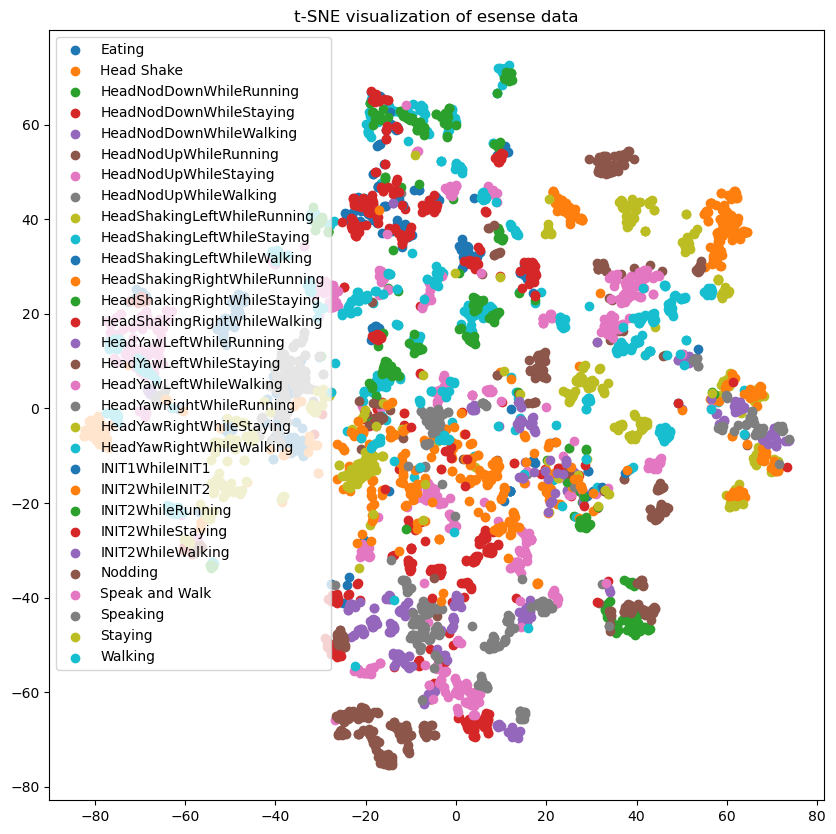

In [70]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform the data to the t-SNE model
tsne_results = tsne.fit_transform(X_train_data_lr)

# Create a scatter plot of the t-SNE output
plt.figure(figsize=(10,10))

# Make sure labels is a numpy array
labels_np = np.array(y_train)

# For each unique label in the 'activity' column
for activity in np.unique(labels_np):
    # Find the subset of points with this activity
    subset = tsne_results[labels_np == activity]
    
    # Plot these points with a specific color/label
    plt.scatter(subset[:, 0], subset[:, 1], label=activity)

plt.legend()  # Show legend to recognize activities by color
plt.title('t-SNE visualization of esense data')
plt.show()


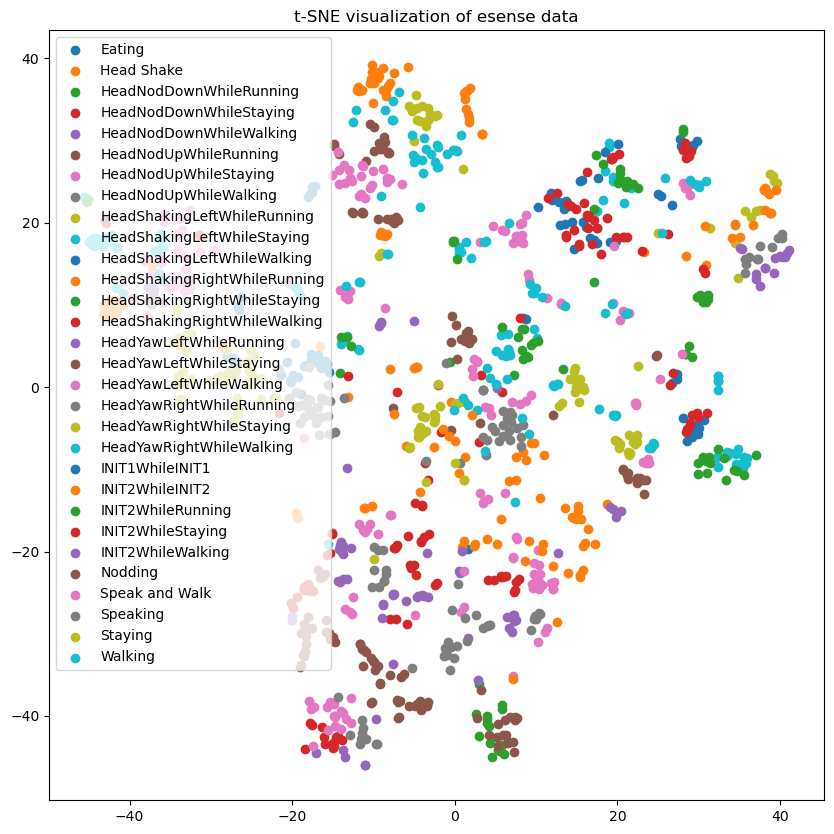

In [75]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform the data to the t-SNE model
tsne_results = tsne.fit_transform(X_test_data_lr)

# Create a scatter plot of the t-SNE output
plt.figure(figsize=(10,10))

# Make sure labels is a numpy array
labels_np = np.array(y_pred_rf)

# For each unique label in the 'activity' column
for activity in np.unique(labels_np):
    # Find the subset of points with this activity
    subset = tsne_results[labels_np == activity]
    
    # Plot these points with a specific color/label
    plt.scatter(subset[:, 0], subset[:, 1], label=activity)

plt.legend()  # Show legend to recognize activities by color
plt.title('t-SNE visualization of esense data')
plt.show()


In [76]:
y_pred = best_svm_model.predict(X_test_data_lr)
accuracy_rf = accuracy_score(y_test, y_pred)
print('SVM Accuracy:', accuracy_rf)
y_pred_mlp = best_mlp_model.predict(X_test_data_lr)


SVM Accuracy: 0.8928571428571429


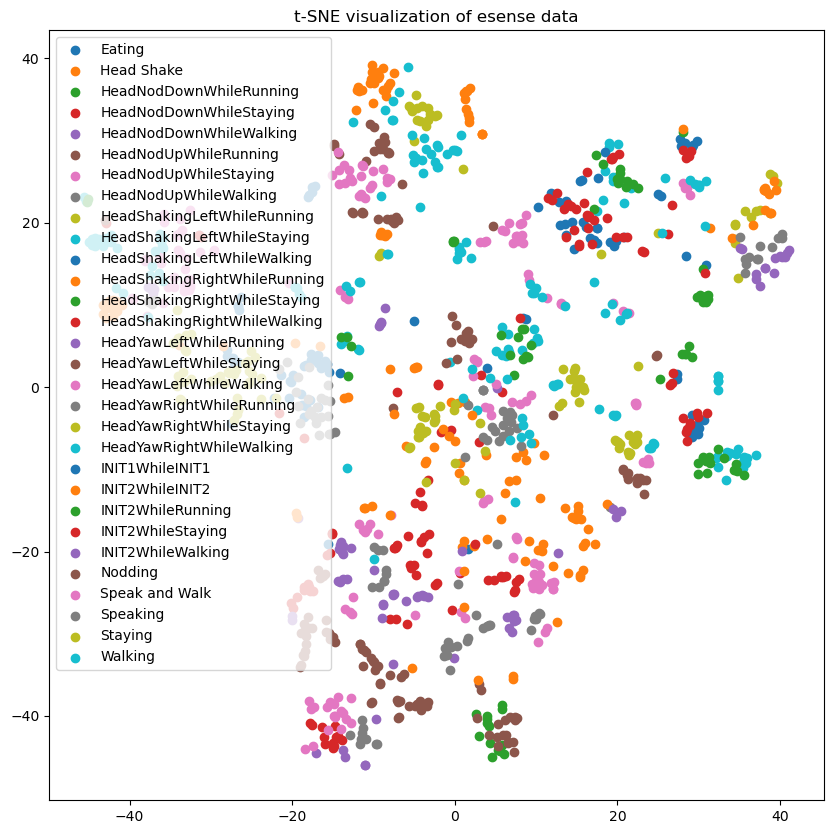

In [77]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform the data to the t-SNE model
tsne_results = tsne.fit_transform(X_test_data_lr)

# Create a scatter plot of the t-SNE output
plt.figure(figsize=(10,10))

# Make sure labels is a numpy array
labels_np = np.array(y_pred)

# For each unique label in the 'activity' column
for activity in np.unique(labels_np):
    # Find the subset of points with this activity
    subset = tsne_results[labels_np == activity]
    
    # Plot these points with a specific color/label
    plt.scatter(subset[:, 0], subset[:, 1], label=activity)

plt.legend()  # Show legend to recognize activities by color
plt.title('t-SNE visualization of esense data')
plt.show()


In [78]:
y_pred_mlp = best_mlp_model.predict(X_test_data_lr)

# Evaluate the accuracy of the classifier
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print('MLP Accuracy:', accuracy_mlp)

MLP Accuracy: 0.8704318936877077


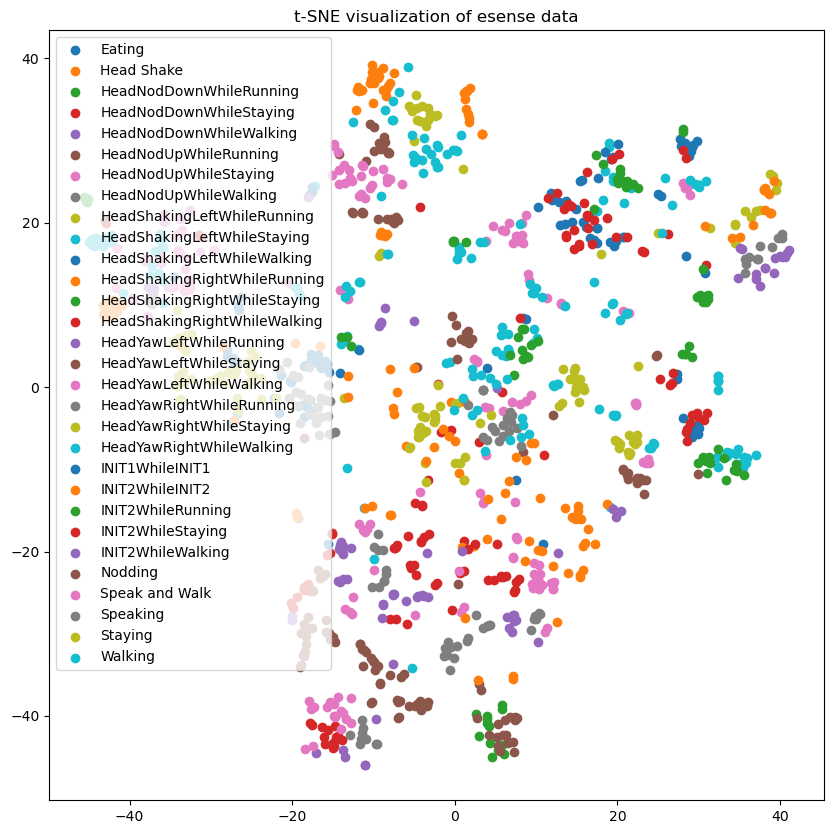

In [79]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform the data to the t-SNE model
tsne_results = tsne.fit_transform(X_test_data_lr)

# Create a scatter plot of the t-SNE output
plt.figure(figsize=(10,10))

# Make sure labels is a numpy array
labels_np = np.array(y_pred_mlp)

# For each unique label in the 'activity' column
for activity in np.unique(labels_np):
    # Find the subset of points with this activity
    subset = tsne_results[labels_np == activity]
    
    # Plot these points with a specific color/label
    plt.scatter(subset[:, 0], subset[:, 1], label=activity)

plt.legend()  # Show legend to recognize activities by color
plt.title('t-SNE visualization of esense data')
plt.show()


In [80]:
y_pred_lr = best_lr_model.predict(X_test_data_lr)
accuracy_mlp = accuracy_score(y_test, y_pred_lr)
print('lr Accuracy:', accuracy_mlp)

lr Accuracy: 0.8156146179401993


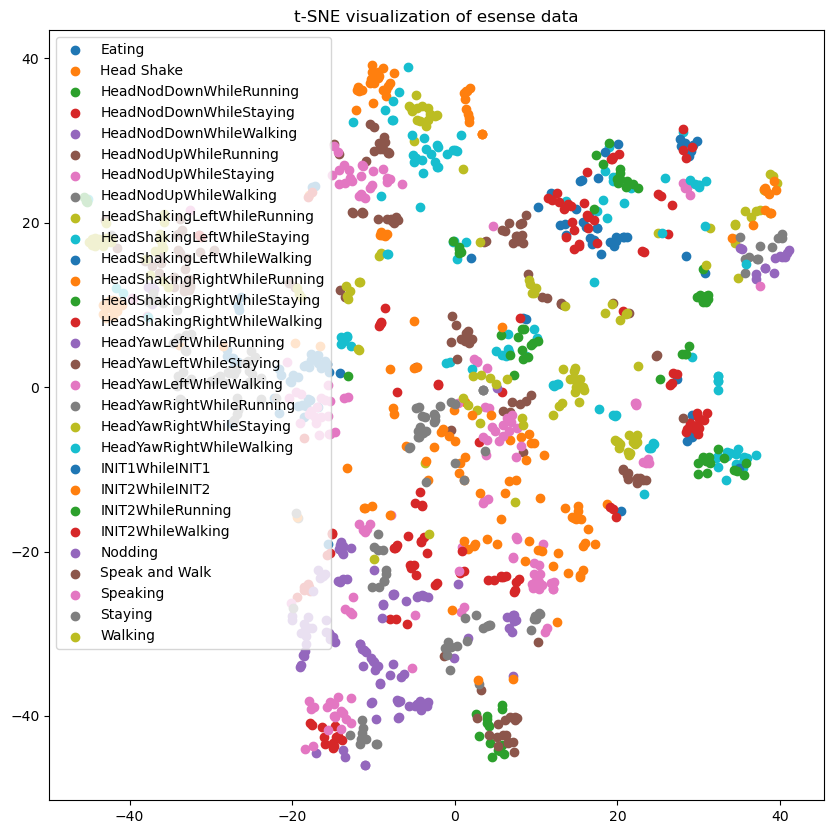

In [81]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform the data to the t-SNE model
tsne_results = tsne.fit_transform(X_test_data_lr)

# Create a scatter plot of the t-SNE output
plt.figure(figsize=(10,10))

# Make sure labels is a numpy array
labels_np = np.array(y_pred_lr)

# For each unique label in the 'activity' column
for activity in np.unique(labels_np):
    # Find the subset of points with this activity
    subset = tsne_results[labels_np == activity]
    
    # Plot these points with a specific color/label
    plt.scatter(subset[:, 0], subset[:, 1], label=activity)

plt.legend()  # Show legend to recognize activities by color
plt.title('t-SNE visualization of esense data')
plt.show()
